(array([ 11.,  17.,  82., 144., 272., 239., 146.,  72.,  11.,   6.]),
 array([-3.17652827, -2.53398282, -1.89143737, -1.24889192, -0.60634646,
         0.03619899,  0.67874444,  1.32128989,  1.96383534,  2.6063808 ,
         3.24892625]),
 <a list of 10 Patch objects>)

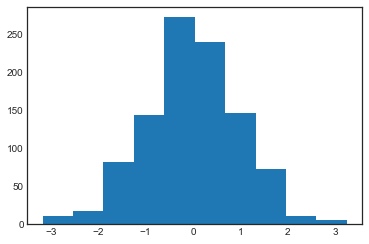

In [1]:
# 频次直方图、数据区间划分和分布密度

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)
plt.hist(data)

(array([0.01867572, 0.00933786, 0.02334465, 0.00933786, 0.01867572,
        0.05135823, 0.07937182, 0.09337861, 0.21010187, 0.18675722,
        0.26612903, 0.21943973, 0.3688455 , 0.51358235, 0.38752122,
        0.42020374, 0.37818336, 0.31748727, 0.29881155, 0.21943973,
        0.16341256, 0.16341256, 0.1073854 , 0.06536503, 0.03268251,
        0.00466893, 0.01400679, 0.01400679, 0.00466893, 0.00933786]),
 array([-3.17652827, -2.96234645, -2.74816464, -2.53398282, -2.319801  ,
        -2.10561918, -1.89143737, -1.67725555, -1.46307373, -1.24889192,
        -1.0347101 , -0.82052828, -0.60634646, -0.39216465, -0.17798283,
         0.03619899,  0.25038081,  0.46456262,  0.67874444,  0.89292626,
         1.10710807,  1.32128989,  1.53547171,  1.74965353,  1.96383534,
         2.17801716,  2.39219898,  2.6063808 ,  2.82056261,  3.03474443,
         3.24892625]),
 <a list of 1 Patch objects>)

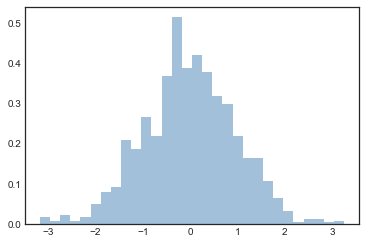

In [3]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none')

(array([0.00346865, 0.00346865, 0.00693731, 0.01387462, 0.01387462,
        0.01387462, 0.02428058, 0.01734327, 0.04509251, 0.04162386,
        0.05202982, 0.07977906, 0.10405964, 0.10059098, 0.13527753,
        0.18037004, 0.14915215, 0.14221484, 0.15955811, 0.20811928,
        0.21158793, 0.20118197, 0.2289312 , 0.1526208 , 0.20811928,
        0.19424466, 0.13527753, 0.14915215, 0.12140291, 0.09365367,
        0.04509251, 0.07284175, 0.05549847, 0.05202982, 0.01734327,
        0.01387462, 0.00693731, 0.        , 0.00693731, 0.00693731]),
 array([-3.03360376, -2.74530755, -2.45701133, -2.16871511, -1.88041889,
        -1.59212268, -1.30382646, -1.01553024, -0.72723403, -0.43893781,
        -0.15064159,  0.13765462,  0.42595084,  0.71424706,  1.00254327,
         1.29083949,  1.57913571,  1.86743192,  2.15572814,  2.44402436,
         2.73232058,  3.02061679,  3.30891301,  3.59720923,  3.88550544,
         4.17380166,  4.46209788,  4.75039409,  5.03869031,  5.32698653,
         5.61528

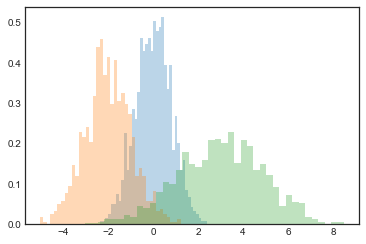

In [5]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [6]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 28 226 511 218  17]


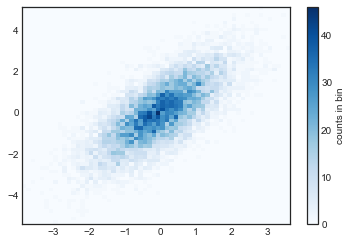

In [11]:
# 二维频次直方图与数据区间划分

mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=60, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

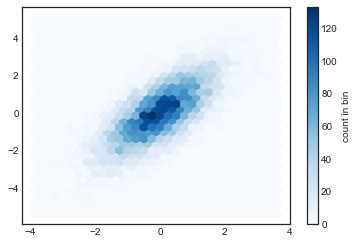

In [13]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

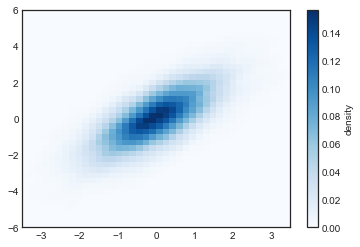

In [14]:
from scipy.stats import gaussian_kde

# 拟合数组维度[Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

# 用一对规则的网格数据进行拟合
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# 画出结果图
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")